In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 데이터 불러오기
df = pd.read_csv('real_final_data.csv', encoding='utf-8-sig')

# ✅ 한글 폰트 설정 (Windows 기준: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801367 entries, 0 to 801366
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   availableCoupons          801367 non-null  bool   
 1   bidCount                  1148 non-null    float64
 2   buyingOptions             801367 non-null  object 
 3   categories                801367 non-null  object 
 4   condition                 801367 non-null  object 
 5   currentBidPrice           1148 non-null    object 
 6   itemCreationDate          801367 non-null  object 
 7   itemEndDate               1148 non-null    object 
 8   itemId                    801367 non-null  object 
 9   itemLocation              801367 non-null  object 
 10  itemOriginDate            801367 non-null  object 
 11  leafCategoryIds           801367 non-null  object 
 12  listingMarketplaceId      801367 non-null  object 
 13  price                     801367 non-null  f

In [26]:
df.describe()

,bidCount,price,discountRatio,feedbackPercentage,feedbackScore
count,1148.000000,801367.000000,801367.000000,801367.000000,8.013670e+05
mean,0.006098,48.044848,6.116759,98.376329,2.858712e+05
std,0.077882,175.700214,15.303953,6.743939,9.155372e+05
min,0.000000,0.720000,-186.000000,0.000000,-1.600000e+01
25%,0.000000,11.450000,0.000000,98.400000,1.219000e+03
50%,0.000000,19.990000,0.000000,99.300000,8.004000e+03
75%,0.000000,41.990000,0.000000,99.700000,5.512000e+04
max,1.000000,45000.000000,100.000000,100.000000,1.304524e+07


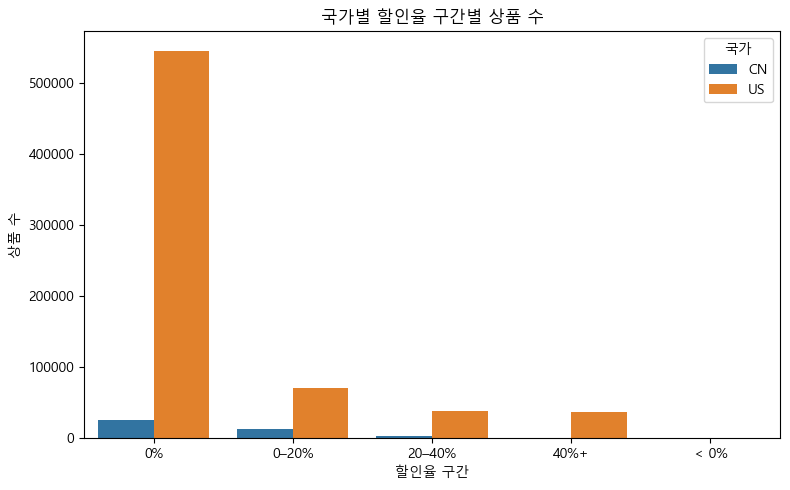

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 할인율 구간화 함수
def categorize_discount(x):
    if x < 0:
        return '< 0%'
    elif x == 0:
        return '0%'
    elif x <= 20:
        return '0–20%'
    elif x <= 40:
        return '20–40%'
    else:
        return '40%+'

# ✅ 미국/중국 필터링
df_filtered = df[df['itemLocation'].isin(['US', 'CN'])].copy()

# ✅ 할인율 구간 컬럼 생성
df_filtered['discount_bin'] = df_filtered['discountRatio'].apply(categorize_discount)

# ✅ 할인율 구간별 국가별 상품 개수 집계
discount_count = (
    df_filtered.groupby(['discount_bin', 'itemLocation'])
    .size()
    .reset_index(name='count')
)

# ✅ 시각화 (단순 개수 비교)
plt.figure(figsize=(8, 5))
sns.barplot(data=discount_count, x='discount_bin', y='count', hue='itemLocation')
plt.title('국가별 할인율 구간별 상품 수')
plt.ylabel('상품 수')
plt.xlabel('할인율 구간')
plt.legend(title='국가')
plt.tight_layout()
plt.show()


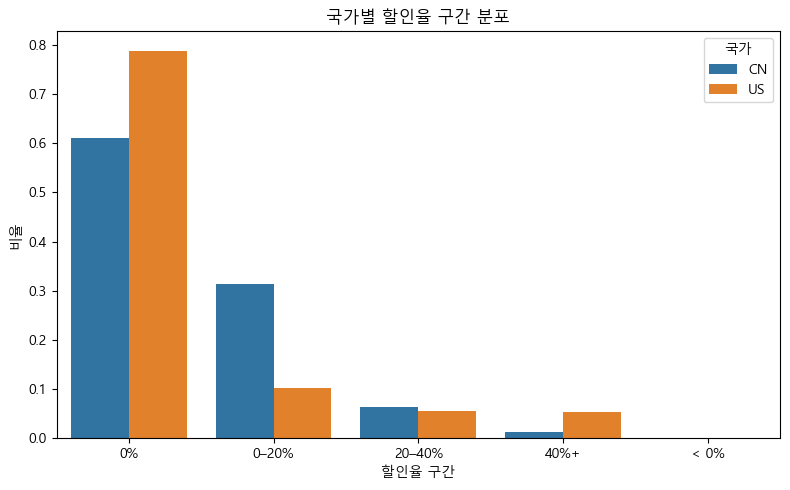

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 미국 또는 중국 상품만 필터링
df_filtered = df[df['itemLocation'].isin(['US', 'CN'])].copy()

# ✅ 할인율 구간화 함수
def categorize_discount(x):
    if x < 0:
        return '< 0%'
    elif x == 0:
        return '0%'
    elif x <= 20:
        return '0–20%'
    elif x <= 40:
        return '20–40%'
    else:
        return '40%+'

# ✅ 할인율 구간 컬럼 생성
df_filtered['discount_bin'] = df_filtered['discountRatio'].apply(categorize_discount)

# ✅ 국가별 할인율 구간 비율 계산 (itemLocation 중복 문제 해결)
discount_dist = (
    df_filtered.groupby(['itemLocation', 'discount_bin'], as_index=False)
    .size()
)

# ✅ 비율 계산
total_per_country = discount_dist.groupby('itemLocation')['size'].transform('sum')
discount_dist['ratio'] = discount_dist['size'] / total_per_country

# ✅ 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=discount_dist, x='discount_bin', y='ratio', hue='itemLocation')
plt.title('국가별 할인율 구간 분포')
plt.ylabel('비율')
plt.xlabel('할인율 구간')
plt.legend(title='국가')
plt.tight_layout()
plt.show()


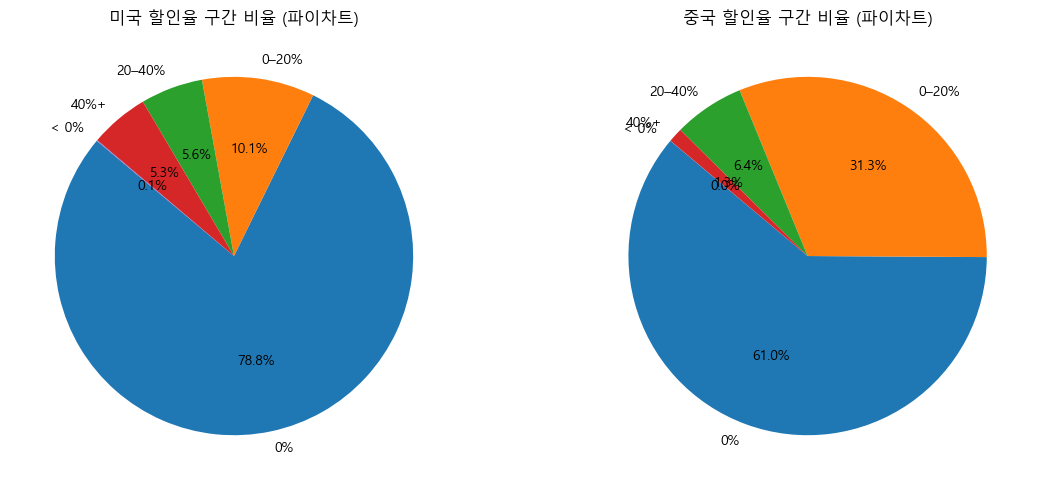

In [13]:
# 미국, 중국 데이터 분리
us_data = df_filtered[df_filtered['itemLocation'] == 'US']
cn_data = df_filtered[df_filtered['itemLocation'] == 'CN']

# 할인율 구간별 비율 계산
us_counts = us_data['discount_bin'].value_counts(normalize=True).sort_index()
cn_counts = cn_data['discount_bin'].value_counts(normalize=True).sort_index()

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].pie(us_counts, labels=us_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('미국 할인율 구간 비율 (파이차트)')

axes[1].pie(cn_counts, labels=cn_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('중국 할인율 구간 비율 (파이차트)')

plt.tight_layout()
plt.show()


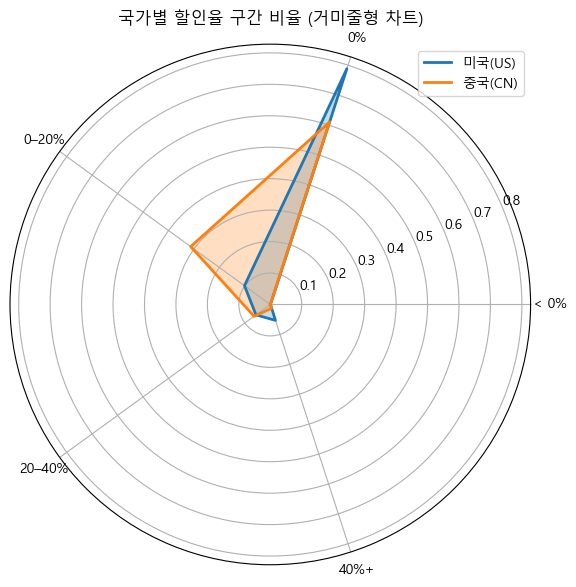

In [15]:
import numpy as np

# ✅ 할인율 구간화 함수
def categorize_discount(x):
    if x < 0:
        return '< 0%'
    elif x == 0:
        return '0%'
    elif x <= 20:
        return '0–20%'
    elif x <= 40:
        return '20–40%'
    else:
        return '40%+'

# ✅ 할인율 구간 컬럼 생성
df_filtered['discount_bin'] = df_filtered['discountRatio'].apply(categorize_discount)

# ✅ 미국과 중국 각각 할인율 구간 비율 계산
us_counts = df_filtered[df_filtered['itemLocation'] == 'US']['discount_bin'].value_counts(normalize=True).sort_index()
cn_counts = df_filtered[df_filtered['itemLocation'] == 'CN']['discount_bin'].value_counts(normalize=True).sort_index()

# ✅ 구간 라벨 정리 (빠진 카테고리 채우기)
categories = ['< 0%', '0%', '0–20%', '20–40%', '40%+']
us_values = [us_counts.get(cat, 0) for cat in categories]
cn_values = [cn_counts.get(cat, 0) for cat in categories]

# ✅ 거미줄형 차트용 값 닫기 (closed loop)
us_values += us_values[:1]
cn_values += cn_values[:1]
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# ✅ 시각화
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, us_values, label='미국(US)', linewidth=2)
ax.fill(angles, us_values, alpha=0.25)

ax.plot(angles, cn_values, label='중국(CN)', linewidth=2)
ax.fill(angles, cn_values, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), categories)
ax.set_title('국가별 할인율 구간 비율 (거미줄형 차트)')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()


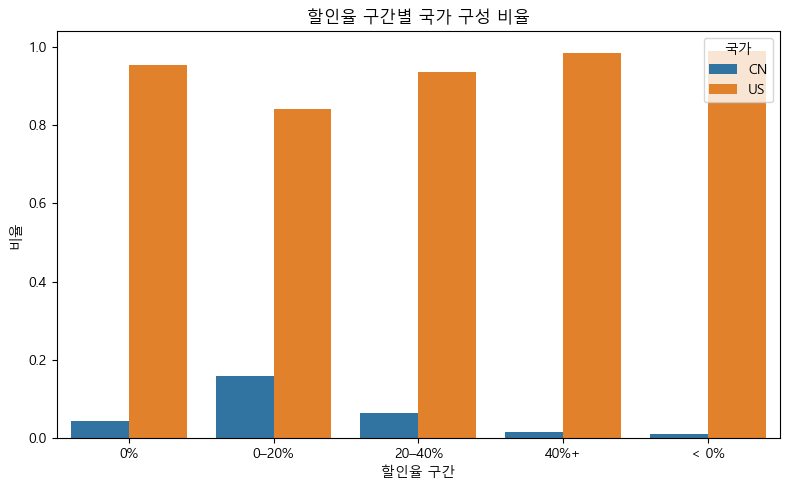

In [16]:

# ✅ 할인율 구간화 함수
def categorize_discount(x):
    if x < 0:
        return '< 0%'
    elif x == 0:
        return '0%'
    elif x <= 20:
        return '0–20%'
    elif x <= 40:
        return '20–40%'
    else:
        return '40%+'

# ✅ 할인율 구간 컬럼 생성
df_filtered['discount_bin'] = df_filtered['discountRatio'].apply(categorize_discount)

# ✅ 할인율 구간별 국가 구성 비율 계산
grouped = (
    df_filtered.groupby(['discount_bin', 'itemLocation'])
    .size()
    .reset_index(name='count')
)

# ✅ 전체 대비 비율
grouped['total'] = grouped.groupby('discount_bin')['count'].transform('sum')
grouped['ratio'] = grouped['count'] / grouped['total']

# ✅ 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='discount_bin', y='ratio', hue='itemLocation')
plt.title('할인율 구간별 국가 구성 비율')
plt.ylabel('비율')
plt.xlabel('할인율 구간')
plt.legend(title='국가')
plt.tight_layout()
plt.show()


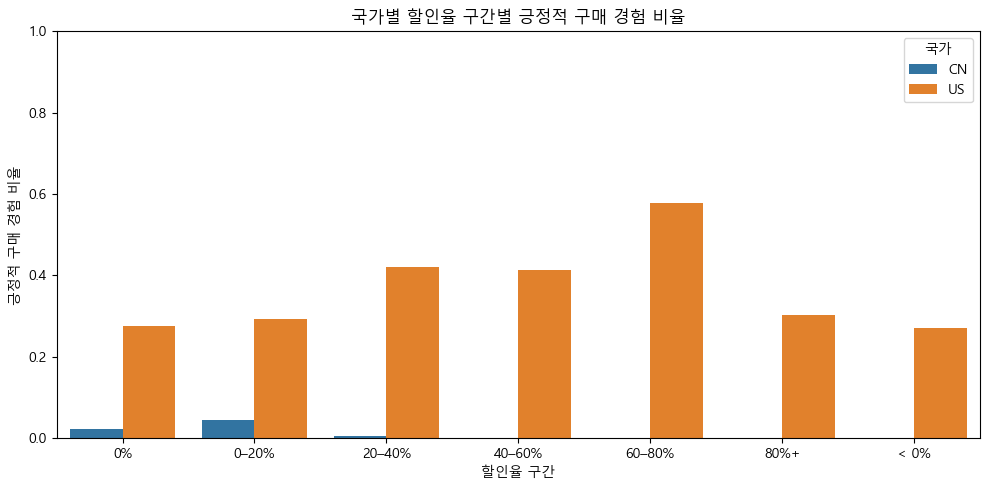

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기 및 필터링
df = pd.read_csv('real_final_data.csv', encoding='utf-8-sig')
df = df[df['itemLocation'].isin(['US', 'CN'])].copy()

# 할인율 구간화
def categorize_discount(x):
    if x < 0:
        return '< 0%'
    elif x == 0:
        return '0%'
    elif x <= 20:
        return '0–20%'
    elif x <= 40:
        return '20–40%'
    elif x <= 60:
        return '40–60%'
    elif x <= 80:
        return '60–80%'
    else:
        return '80%+'

df['discount_bin'] = df['discountRatio'].apply(categorize_discount)

# 국가 + 할인율 구간별 topRated 비율 계산
grouped = (
    df.groupby(['itemLocation', 'discount_bin', 'topRatedBuyingExperience'])
    .size()
    .reset_index(name='count')
)

# 각 그룹 내 비율 계산
grouped['total'] = grouped.groupby(['itemLocation', 'discount_bin'])['count'].transform('sum')
grouped['ratio'] = grouped['count'] / grouped['total']

# 긍정 경험만 필터링
positive = grouped[grouped['topRatedBuyingExperience'] == True]

# 시각화
plt.figure(figsize=(10, 5))
sns.barplot(data=positive, x='discount_bin', y='ratio', hue='itemLocation')
plt.title('국가별 할인율 구간별 긍정적 구매 경험 비율')
plt.xlabel('할인율 구간')
plt.ylabel('긍정적 구매 경험 비율')
plt.ylim(0, 1)
plt.legend(title='국가')
plt.tight_layout()
plt.show()


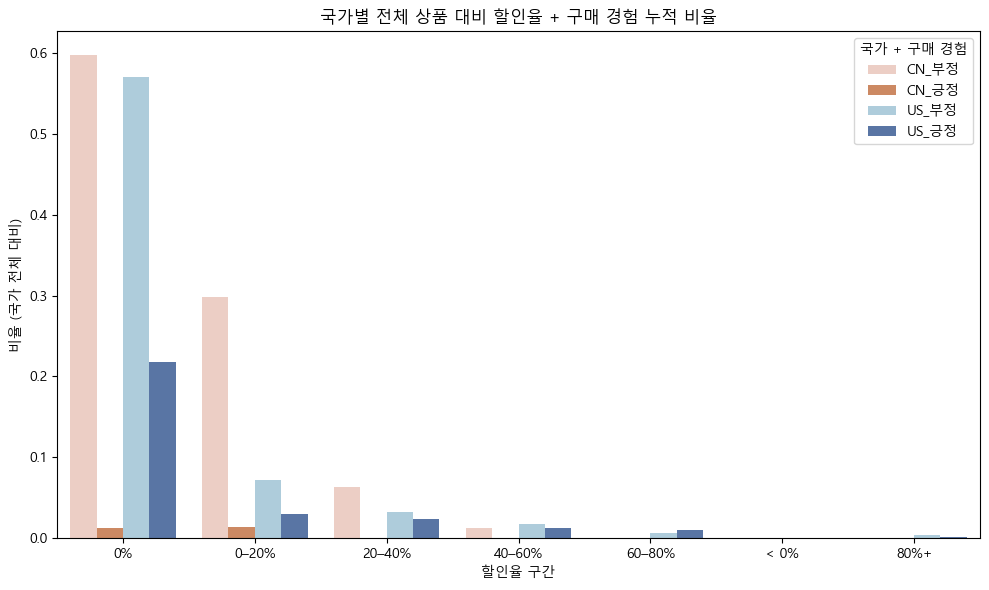

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ✅ 할인율 구간화 함수
def categorize_discount(x):
    if x < 0:
        return '< 0%'
    elif x == 0:
        return '0%'
    elif x <= 20:
        return '0–20%'
    elif x <= 40:
        return '20–40%'
    elif x <= 60:
        return '40–60%'
    elif x <= 80:
        return '60–80%'
    else:
        return '80%+'

df['discount_bin'] = df['discountRatio'].apply(categorize_discount)

# ✅ 그룹별 개수 집계 및 비율 계산
grouped = (
    df.groupby(['itemLocation', 'discount_bin', 'topRatedBuyingExperience'])
    .size()
    .reset_index(name='count')
)
grouped['total'] = grouped.groupby('itemLocation')['count'].transform('sum')
grouped['ratio'] = grouped['count'] / grouped['total']

# ✅ 시각화를 위한 컬럼 결합 (색상 구분용)
grouped['group'] = grouped['itemLocation'] + '_' + grouped['topRatedBuyingExperience'].map({True: '긍정', False: '부정'})

# ✅ 색상 수동 지정
palette = {
    'US_긍정': '#4C72B0',
    'US_부정': '#A6CEE3',
    'CN_긍정': '#DD8452',
    'CN_부정': '#F3CBBE'
}

# ✅ 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped,
    x='discount_bin',
    y='ratio',
    hue='group',
    palette=palette
)
plt.title('국가별 전체 상품 대비 할인율 + 구매 경험 누적 비율')
plt.ylabel('비율 (국가 전체 대비)')
plt.xlabel('할인율 구간')
plt.legend(title='국가 + 구매 경험')
plt.tight_layout()
plt.show()


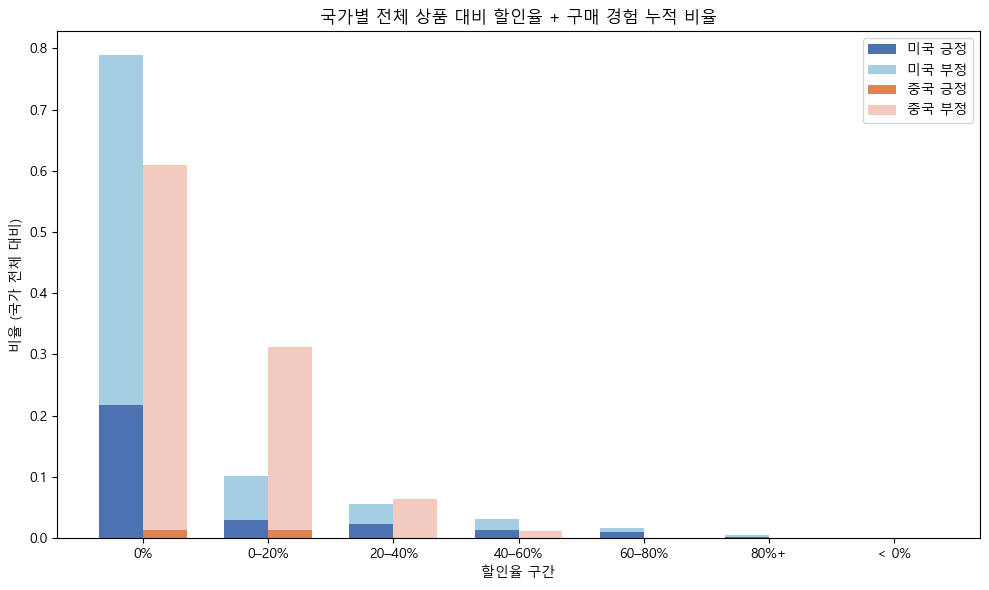

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 할인율 구간화 함수
def categorize_discount(x):
    if x < 0:
        return '< 0%'
    elif x == 0:
        return '0%'
    elif x <= 20:
        return '0–20%'
    elif x <= 40:
        return '20–40%'
    elif x <= 60:
        return '40–60%'
    elif x <= 80:
        return '60–80%'
    else:
        return '80%+'

# ✅ 구간 컬럼 생성
df['discount_bin'] = df['discountRatio'].apply(categorize_discount)

# ✅ 집계 및 비율 계산
grouped = (
    df.groupby(['itemLocation', 'discount_bin', 'topRatedBuyingExperience'])
    .size()
    .reset_index(name='count')
)
grouped['total'] = grouped.groupby('itemLocation')['count'].transform('sum')
grouped['ratio'] = grouped['count'] / grouped['total']

# ✅ 피벗 테이블로 정리: 할인율 구간 × (국가 + 긍/부정)
pivot_df = grouped.pivot_table(
    index='discount_bin',
    columns=['itemLocation', 'topRatedBuyingExperience'],
    values='ratio',
    fill_value=0
).sort_index()

# ✅ 시각화
discount_bins = pivot_df.index.tolist()
bar_width = 0.35
x = range(len(discount_bins))

fig, ax = plt.subplots(figsize=(10, 6))

# 미국 막대 (긍정 + 부정 누적)
us_positive = pivot_df[('US', True)]
us_negative = pivot_df[('US', False)]
ax.bar(x, us_positive, width=bar_width, label='미국 긍정', color='#4C72B0')
ax.bar(x, us_negative, width=bar_width, bottom=us_positive, label='미국 부정', color='#A6CEE3')

# 중국 막대 (오른쪽으로 살짝 이동)
cn_positive = pivot_df[('CN', True)]
cn_negative = pivot_df[('CN', False)]
ax.bar(
    [i + bar_width for i in x], cn_positive, width=bar_width, label='중국 긍정', color='#DD8452'
)
ax.bar(
    [i + bar_width for i in x], cn_negative, width=bar_width, bottom=cn_positive, label='중국 부정', color='#F3CBBE'
)

# x축 설정
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(discount_bins)
ax.set_xlabel('할인율 구간')
ax.set_ylabel('비율 (국가 전체 대비)')
ax.set_title('국가별 전체 상품 대비 할인율 + 구매 경험 누적 비율')
ax.legend()
plt.tight_layout()
plt.show()
